# <center>MLFND - M4 Project : Titanic Data Analysis</center>

# 1. Introduction

    The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

    One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## 1.1 About the dataset

    The Titanic data set available for study contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. This section gives information about the variables/fields present in the data.

### Variable Description:

    Variables or fields used in the titanic data are listed and described below:
```
    1. survival        Survival (0 = No; 1 = Yes)
    2. pclass          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    3. name            Name
    4. sex             Sex
    5. age             Age
    6. sibsp           Number of Siblings/Spouses Aboard
    7. parch           Number of Parents/Children Aboard
    8. ticket          Ticket Number
    9. fare            Passenger Fare
    10 cabin           Cabin
    11.embarked        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

    SPECIAL NOTES:
        Pclass is a proxy for socio-economic status (SES):
                             1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

        Age is in Years; Fractional if Age less than One (1):
                             If the Age is Estimated, it is in the form xx.5

        With respect to the family relation variables (i.e. sibsp and parch)
        some relations were ignored.  The following are the definitions used
        for sibsp and parch.

        Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
        Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
        Parent:   Mother or Father of Passenger Aboard Titanic
        Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

        Other family relatives excluded from this study include cousins,
        nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
        only with a nanny, therefore parch=0 for them.  As well, some
        travelled with very close friends or neighbors in a village, however,
        the definitions do not support such relations.
```

# 2. Data Analysis Process

## 2.1 Questions Phase
    Undersatnd the data and frame the relavant Questions.
    Some of the questions identified and to be answered during analysis are listed below:
           * Q1. Does the titanic data needs cleaning?
           * Q2. Does 'women and children first' policy being adhered during emergency?
           * Q3. Whether first class passengers have more chances of survival?
           * Q4. Comparision of survival by category of class and gender?
           * Q5. Man with childs or spouse had more chances of survival compared to single?

## 2.2 Data Wrangling Phase

    Data Wrangling Phase contains two parts : Data Acquisition, Data Cleaning
    Data Acquisition - Get the Titanic Data
    Data Cleaning    - Explore the data set to find any surprising data points, then fix problems if any.

### 2.2.1 Data Acquisition - Get the Titanic Data

In [1]:
# import headers
import pandas as pd             # import pandas library
import numpy as np              # import numpy library
import matplotlib.pyplot as plt # import matplotlib library
import seaborn as sns           # import seaborn library
%matplotlib inline

In [2]:
# Read the raw data from titanic data

# data file path macros
TITANIC_DATA_FILE_PATH = "./data/titanic-data.csv"

#read titanic data
raw_data_df = pd.read_csv(TITANIC_DATA_FILE_PATH)
#display titanic data headers for better unersanding
raw_data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.2.2 Data Cleaning

#### 2.2.2.1 Does the Titanic data needs cleaning?  [Q1] 


#### Data Preparation
    Prepare the data to answer the questions identified earlier.
    Important fields required are: [Survived, Name, Pclass, Sex, Age, SibSp, Parch]

In [3]:
# Choose the relavant fields for analysis and discard remaining
titanic_df = raw_data_df[["Survived", "Name", "Pclass", "Sex", "Age", "SibSp", "Parch"]]
# print summary of the titanic data
titanic_df.describe(include="all")

,Survived,Name,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891,891.000000,891,714.000000,891.000000,891.000000
unique,NaN,891,NaN,2,NaN,NaN,NaN
top,NaN,"Graham, Mr. George Edward",NaN,male,NaN,NaN,NaN
freq,NaN,1,NaN,577,NaN,NaN,NaN
mean,0.383838,NaN,2.308642,NaN,29.699118,0.523008,0.381594
std,0.486592,NaN,0.836071,NaN,14.526497,1.102743,0.806057
min,0.000000,NaN,1.000000,NaN,0.420000,0.000000,0.000000
25%,0.000000,NaN,2.000000,NaN,20.125000,0.000000,0.000000
50%,0.000000,NaN,3.000000,NaN,28.000000,0.000000,0.000000
75%,1.000000,NaN,3.000000,NaN,38.000000,1.000000,0.000000


#### Observation:
    1.  Titanic data contains total of 891 Passengers
    2.  714 out of 891 only contain gender information, remaining doesn't. 
        (So we may need to discard passengers who doesn't have gender info)
    3. other data looks normal.

In [4]:
# create new data frame that contian age not null.
titanic_df = titanic_df[titanic_df["Age"].notnull()]
print "Total number of Passengers considered for data analysis:", len(titanic_df)

Total number of Passengers considered for data analysis: 714


### 2.2.3 Data Exploration

Total Passenger count: 714
Gender wise statistics:
male      453
female    261
Name: Sex, dtype: int64


,Survived,Name,Pclass,Sex,Age,SibSp,Parch
count,714.000000,714,714.000000,714,714.000000,714.000000,714.000000
unique,NaN,714,NaN,2,NaN,NaN,NaN
top,NaN,"Graham, Mr. George Edward",NaN,male,NaN,NaN,NaN
freq,NaN,1,NaN,453,NaN,NaN,NaN
mean,0.406162,NaN,2.236695,NaN,29.699118,0.512605,0.431373
std,0.491460,NaN,0.838250,NaN,14.526497,0.929783,0.853289
min,0.000000,NaN,1.000000,NaN,0.420000,0.000000,0.000000
25%,0.000000,NaN,1.000000,NaN,20.125000,0.000000,0.000000
50%,0.000000,NaN,2.000000,NaN,28.000000,0.000000,0.000000
75%,1.000000,NaN,3.000000,NaN,38.000000,1.000000,1.000000


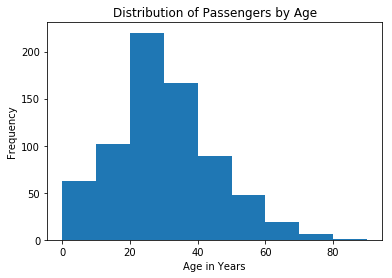

In [5]:
print 'Total Passenger count:', len(titanic_df)
print 'Gender wise statistics:' 
print  titanic_df["Sex"].value_counts()
plt.figure()
titanic_df["Age"].plot.hist(title="Distribution of Passengers by Age", bins=range(0, 100, 10)).set_xlabel("Age in Years")
# print summary of the titanic data
titanic_df.describe(include="all")

#### Observation:
        Based on above diagram majority of the passenger(s) travelling are in the age group between [20-40]

#### 2.2.3.1 Does 'women and children first' followed during emergency?                                                                    [Q2] 

In [6]:
# return 0 if the passenger is > 18, 1 if <= 18
def isChild(x):
    if x > 18:
        return 0
    else:
        return 1

titanic_df["IsChild"] = pd.Series(titanic_df["Age"].apply(isChild), index=titanic_df.index)

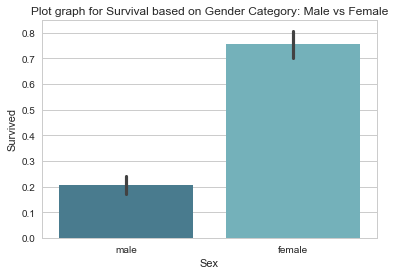

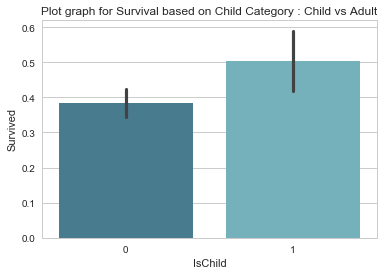

In [7]:
sns.set(style="whitegrid")

# plot a graph that depicts Survival based on Gender Category: Male vs Female
plt.figure()
sns.barplot(data=titanic_df,x="Sex",y="Survived", palette="GnBu_d")
ax = plt.axes()
ax.set_title('Plot graph for Survival based on Gender Category: Male vs Female')

# plot a graph that depicts Survival based on Child Category : Child vs Adult
plt.figure()
sns.barplot(data=titanic_df,x="IsChild",y="Survived", palette="GnBu_d")
ax = plt.axes()
ax.set_title('Plot graph for Survival based on Child Category : Child vs Adult')

####  Observation:
From the above graphs,it is evident that Survaval chance is very high in Female Gender passengers. 
And also Survival Chance is also High in Child.
So it can be concluded that "women and children first" policy might have followed during emergency.



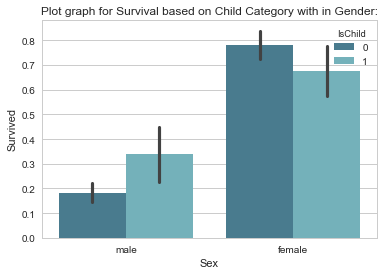

In [8]:
sns.barplot(data=titanic_df, x="Sex", y="Survived", hue="IsChild", palette="GnBu_d")
ax = plt.axes()
ax.set_title('Plot graph for Survival based on Child Category with in Gender:')

####  Observation:
    from the above graphs, female childs have less survival compared to male child.

#### 2.2.3.1 Whether first class passengers have more chances of survival? [Q3]

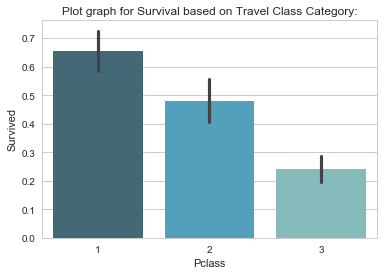

In [9]:
# Draw a barplot to depict Travel classwise Survival
sns.barplot(data=titanic_df, x="Pclass", y="Survived", palette="GnBu_d")
ax = plt.axes()
ax.set_title('Plot graph for Survival based on Travel Class Category:')

####  Observation:
   First class passengers had more chances of survive than second class and a lot more than third class. Chances of survival has some corrilation with Travel Class.

#### 2.2.3.2 Comparision of survivors by class and gender [Q4]

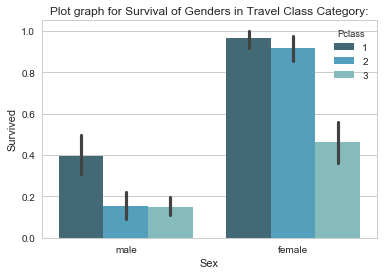

In [10]:
sns.barplot(data=titanic_df, x="Sex", y="Survived", hue="Pclass", palette="GnBu_d")
ax = plt.axes()
ax.set_title('Plot graph for Survival of Genders in Travel Class Category:')

####  Observation:
   1. Men Survival mean is different for women, which was observed earlier as well.
   2.Survival mean is different in various travel classes. 
   2.1 Men Survial first class is much hugher when compared to other classes.
   2.2 Women Survived in first and second classes are much higher compared to third class.

#### 2.2.3.3  Man with childs or spouse had more chances of survival compared to single? [Q5]

In [11]:
import warnings
warnings.filterwarnings('ignore')

def isAdultMan(x):
    return x["IsChild"] == 0 and x["Sex"] == "male"

man_titanic_df = titanic_df[titanic_df.apply(isAdultMan, axis=1)]

def isFamilyMan(x):
    if x["SibSp"] > 0:
        if x["Parch"] > 0:
            return "Father"
        else:
            return "Husband"
    else:
        return "Single"

man_titanic_df["FamilyMan"] = pd.Series(man_titanic_df.apply(isFamilyMan, axis=1), index=man_titanic_df.index)
print man_titanic_df["FamilyMan"].value_counts()

Single     299
Husband     59
Father      24
Name: FamilyMan, dtype: int64


####  Observation:
   More Single Male number has survived compared to Husband or Father.

Husbands survived(%): 23.7288135593
Singles survived(%): 17.0568561873
Fathers survived(%): 16.6666666667


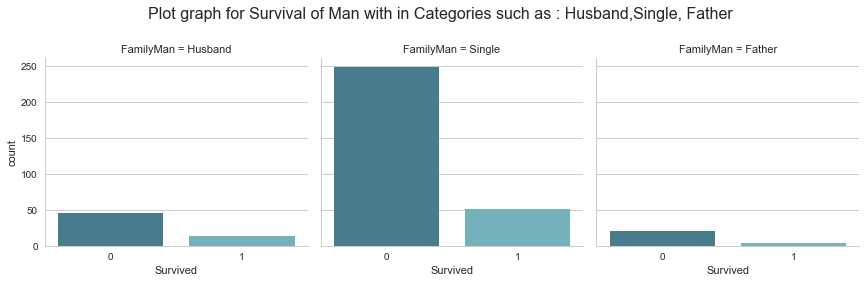

In [12]:
def manPercentSurvived(x, type):
    sub = x[x["FamilyMan"] == type]
    total = len(sub)
    survived = sum(sub["Survived"] == 1)
    return float(survived)/total * 100

print "Husbands survived(%):", manPercentSurvived(man_titanic_df,"Husband")
print "Singles survived(%):", manPercentSurvived(man_titanic_df,"Single")
print "Fathers survived(%):", manPercentSurvived(man_titanic_df,"Father")

g = sns.factorplot(data=man_titanic_df,x="Survived", col="FamilyMan", kind="count",palette="GnBu_d")
TITLE = 'Plot graph for Survival of Man with in Categories such as : Husband,Single, Father'
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(TITLE, fontsize=16)


####  Observation:
    Based on above analysis,Husbands survived(%) is greater than Singles survived(%)or Fathers survived(%)

### 2.2.4 Conclusion Phase

1. ["Survived", "Name", "Pclass", "Sex", "Age", "SibSp", "Parch"] fields are considered for Data Analysis based on questions to be answered.

2. Titanic data needs cleaning as Sex field is missing for some of the passengers, So 714 out of 891 are consider for anaysis

3. Total Passengers(714), Male(453),Female(261)

4. It is evident that Survaval chance is very high in Female Gender passengers.
   And also Survival Chance is also High in Child.
   So it can be concluded that "women and children first" policy might have followed during emergency or there could be
   different safety mecahnism followed forwomen and children,not sure.
   
5. Female childs have less survival compared to male child.
6. Men Survival mean is different from women
   Survival mean is different in various travel classes. 
   Men Survial first class is much hugher when compared to other classes.
   Women Survived in first and second classes are much higher compared to third class.
7. More Single Male number has survived compared to Husband or Father.
8. Husbands survived(%) is greater than Singles survived(%)or Fathers survived(%)


Note: We are not sure on difference between the sample and the population, we don't know how the sample was chosen from the actual population of people that were on the Titanic. There could have been some sort of intentional or unintentional bias in how the sample was selected.

## References

Following sources are referred to complete this investigation:

   - Titanic dataset provided by Udacity (MLFND --> Data Analysis)
   - Video lectures of the course (Data Analysis)
   - Kaggle titanic competition page (https://www.kaggle.com/c/titanic)
   - Pandas documentation (http://pandas.pydata.org/pandas-docs/stable/#)
   - Seaborn statistical data visualization reference page (http://stanford.edu/~mwaskom/software/seaborn/